In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
Sales_data=pd.read_csv("advertising.csv")

In [3]:
Sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Preprocessing data

In [4]:
Sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
Sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Correlation between numerical features

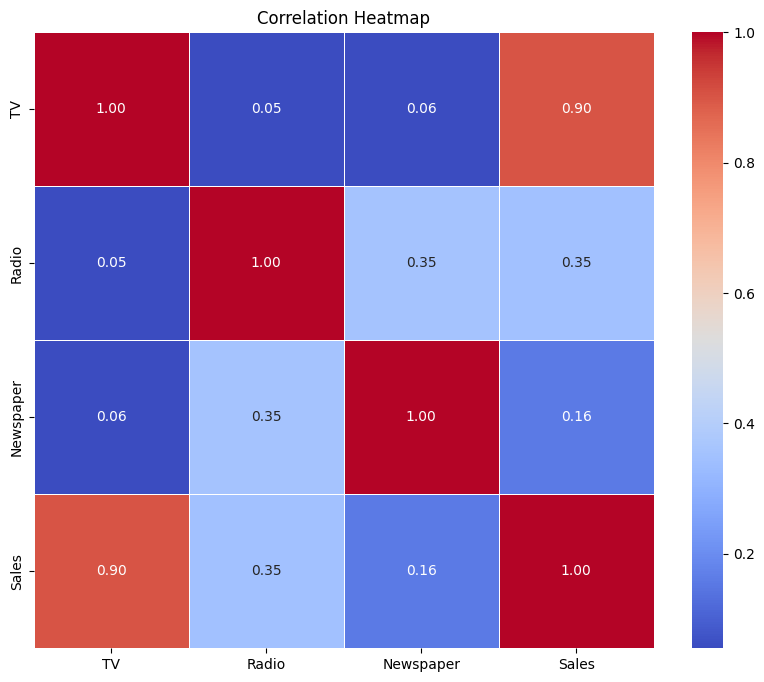

In [11]:
correlation_matrix = Sales_data.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation coefficient between Sales and TV advertising expenditure is 0.90, it suggests a very strong positive linear relationship between these two variables.
- A positive correlation coefficient (in this case, 0.90) indicates that as one variable (TV advertising expenditure) increases, the other variable (Sales) tends to increase as well.

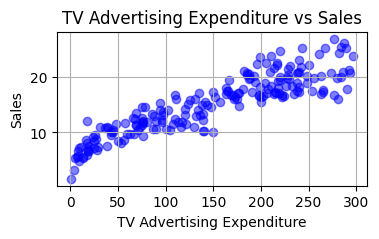

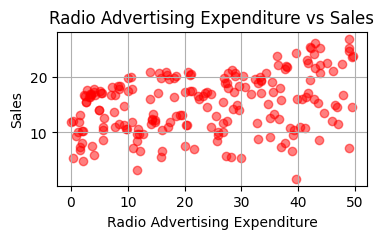

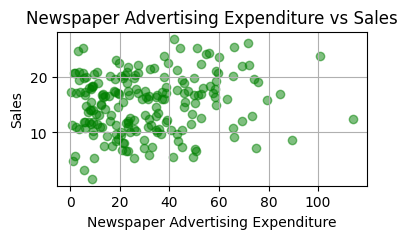

In [23]:
# Plotting TV advertising expenditure vs Sales
plt.figure(figsize=(4, 2))
plt.scatter(Sales_data['TV'], Sales_data['Sales'], color='blue', alpha=0.5)
plt.title('TV Advertising Expenditure vs Sales')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Plotting Radio advertising expenditure vs Sales
plt.figure(figsize=(4, 2))
plt.scatter(Sales_data['Radio'], Sales_data['Sales'], color='red', alpha=0.5)
plt.title('Radio Advertising Expenditure vs Sales')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Plotting Newspaper advertising expenditure vs Sales
plt.figure(figsize=(4, 2))
plt.scatter(Sales_data['Newspaper'], Sales_data['Sales'], color='green', alpha=0.5)
plt.title('Newspaper Advertising Expenditure vs Sales')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


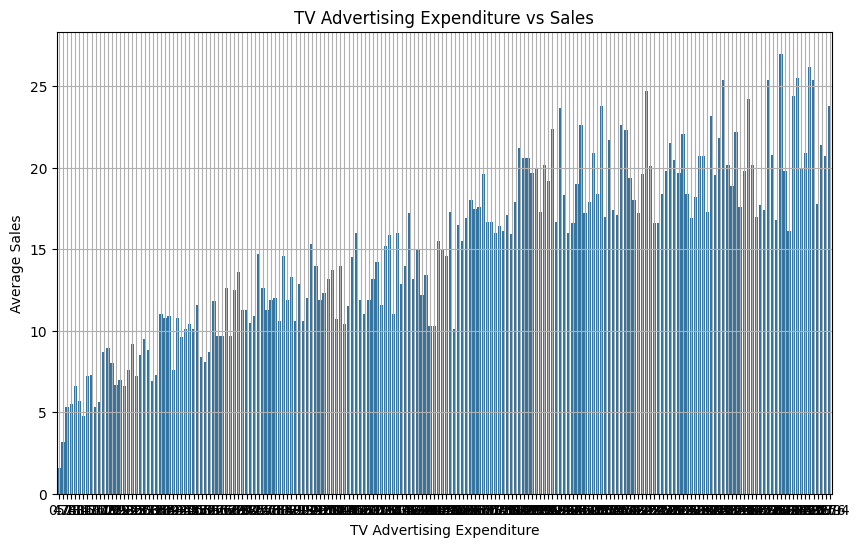

In [19]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Sales_data, x='TV', y='Sales', errorbar=None)
plt.title('TV Advertising Expenditure vs Sales')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()



### Model Selection

In [38]:
# Spliting data

In [37]:
X = Sales_data[['TV', 'Radio', 'Newspaper']]
y = Sales_data['Sales']

# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Define a list of regression algorithms to try
algorithms = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'k-Nearest Neighbors': KNeighborsRegressor()
}


# Evaluate each algorithm using cross-validation
for name, model in algorithms.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores) ** 0.5  # Calculate RMSE from negative MSE scores
    mean_rmse = rmse_scores.mean()
    std_rmse = rmse_scores.std()
    
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()
    
    print(f'{name}: Mean RMSE = {mean_rmse:.4f}, Std RMSE = {std_rmse:.4f}, Mean R-squared = {mean_r2:.4f}, Std R-squared = {std_r2:.4f}')



Linear Regression: Mean RMSE = 1.6658, Std RMSE = 0.2889, Mean R-squared = 0.8954, Std R-squared = 0.0314
Decision Tree: Mean RMSE = 1.5843, Std RMSE = 0.1487, Mean R-squared = 0.9058, Std R-squared = 0.0200
Random Forest: Mean RMSE = 1.2334, Std RMSE = 0.2538, Mean R-squared = 0.9417, Std R-squared = 0.0211
Support Vector Machine: Mean RMSE = 1.9084, Std RMSE = 0.2551, Mean R-squared = 0.8644, Std R-squared = 0.0279
k-Nearest Neighbors: Mean RMSE = 1.6534, Std RMSE = 0.1961, Mean R-squared = 0.8983, Std R-squared = 0.0184


**Based on these results:**

Random Forest has the lowest mean RMSE (1.2334) and highest mean R-squared (0.9417), indicating superior performance in terms of both accuracy and model fit.
Decision Tree also performs well, with a slightly higher mean RMSE (1.5843) but still a high mean R-squared (0.9058).
Linear Regression, k-Nearest Neighbors, and Support Vector Machine show decent performance, but they have higher RMSE and slightly lower R-squared compared to Random Forest and Decision Tree.

let's choose the Random Forest model.

### Model Training

In [46]:
X = Sales_data[['TV', 'Radio', 'Newspaper']]
y = Sales_data['Sales']

# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.9179999999999993


In [50]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5  # Calculate RMSE from negative MSE scores
mean_rmse = rmse_scores.mean()
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mean_r2 = r2_scores.mean()
print(f'RandomForestRegressor : Mean RMSE = {mean_rmse:.4f}, Mean R-squared = {mean_r2:.4f}')

RandomForestRegressor : Mean RMSE = 1.2334, Mean R-squared = 0.9417


### Fine Tuning:

In [51]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search
grid_search.fit(X, y)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Model: RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)


In [56]:
# Train the Model (using the best hyperparameters from grid search)
best_model = RandomForestRegressor(max_depth=10, n_estimators=150, min_samples_leaf=1, min_samples_split=2, random_state=42)
best_model.fit(X_train, y_train)

# Make Predictions
y_pred = best_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 1.4622378815082802
Root Mean Squared Error: 1.2092302847300345
R-squared: 0.95268007023995


These metrics collectively indicate that the RandomForestRegressor model with the best hyperparameters performs well in predicting sales based on the advertising expenditures on TV, Radio, and Newspaper. The low MSE and RMSE along with the high R-squared value suggest that the model's predictions are accurate and explain a significant portion of the variance in the sales data.